## Exercises 🛠

1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*
3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.
4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.
5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.



In [4]:
#import libraries 
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

1. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

In [5]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output shape is 1, activation is sigmoid (binary)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # loss function for binary classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [7]:
model_1.build(input_shape=(None,2))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  18        
                                                                 
 dense_1 (Dense)             multiple                  42        
                                                                 
 dense_2 (Dense)             multiple                  42        
                                                                 
 dense_3 (Dense)             multiple                  42        
                                                                 
 dense_4 (Dense)             multiple                  42        
                                                                 
 dense_5 (Dense)             multiple                  42        
                                                                 
 dense_6 (Dense)             multiple                  7

2. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [8]:
# Importing the make moons from sklearn datasets 
from sklearn.datasets import make_moons

# Make 3k samples 
n_samples = 1000

# Create circles 
X , y = make_moons(n_samples = n_samples ,
                   random_state = 42)

# Checking the shape of X and y 
print(X.shape , y.shape)

# Packing them into a dataframe 
make_moons_df = pd.DataFrame({'col_1': X[: , 0] , 
                              'col_2': X[: , 1], 
                              'label': y})
make_moons_df.head()

(1000, 2) (1000,)


,col_1,col_2,label
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


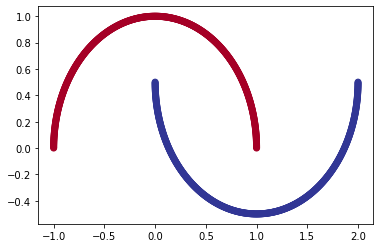

In [9]:
plt.scatter(make_moons_df.loc[:,"col_1"], make_moons_df.loc[:,"col_2"], c=y, cmap=plt.cm.RdYlBu)

In [10]:
# Splitting the dataset into train and test 
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , 
                                                       test_size = 0.2 , 
                                                       random_state = 42)

In [11]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=25)

Epoch 1/25
32/32 [==============================] - 3s 6ms/step - loss: 0.4475 - accuracy: 0.8440
Epoch 2/25
32/32 [==============================] - 0s 4ms/step - loss: 0.2165 - accuracy: 0.8790
Epoch 3/25
32/32 [==============================] - 0s 4ms/step - loss: 0.1309 - accuracy: 0.9420
Epoch 4/25
32/32 [==============================] - 0s 4ms/step - loss: 0.0593 - accuracy: 0.9670
Epoch 5/25
32/32 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.9860
Epoch 6/25
32/32 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7/25
32/32 [==============================] - 0s 4ms/step - loss: 6.0523e-04 - accuracy: 1.0000
Epoch 8/25
32/32 [==============================] - 0s 4ms/step - loss: 2.9803e-04 - accuracy: 1.0000
Epoch 9/25
32/32 [==============================] - 0s 4ms/step - loss: 1.9982e-04 - accuracy: 1.0000
Epoch 10/25
32/32 [==============================] - 0s 4ms/step - loss: 1.4844e-04 - accuracy: 1.0000
Epo

In [13]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 5.0996e-06 - accuracy: 1.0000


[5.099600457469933e-06, 1.0]

doing binary classifcation...


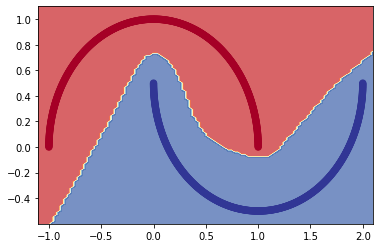

In [14]:
plot_decision_boundary(model_1, X, y)

3. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.
5. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [15]:
# Getting the MNIST data from the keras dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_2.fit(train_data,
                      train_labels,
                      epochs=10,
                      validation_data=(test_data, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 9s 5ms/step - loss: 0.9352 - accuracy: 0.7649 - val_loss: 0.5347 - val_accuracy: 0.8160
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4876 - accuracy: 0.8262 - val_loss: 0.5233 - val_accuracy: 0.8198
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4452 - accuracy: 0.8414 - val_loss: 0.4811 - val_accuracy: 0.8203
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4124 - accuracy: 0.8528 - val_loss: 0.4773 - val_accuracy: 0.8369
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3883 - accuracy: 0.8600 - val_loss: 0.4389 - val_accuracy: 0.8426
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3718 - accuracy: 0.8649 - val_loss: 0.4382 - val_accuracy: 0.8391
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3540 - accuracy: 0.8732 - val_loss: 0.4046 - val_accuracy: 0.8627
Ep

In [18]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [19]:
# Divide train and test images by the maximum value (normalize it)
norm_train_data = train_data / 255.0
norm_test_data = test_data / 255.0

# Check the min and max values of the training data
norm_train_data.min(), norm_train_data.max()

(0.0, 1.0)

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.0009), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
norm_history = model_3.fit(norm_train_data,
                           train_labels,
                           epochs=10,
                           validation_data=(norm_test_data, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4994 - accuracy: 0.8217 - val_loss: 0.4204 - val_accuracy: 0.8468
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3711 - accuracy: 0.8638 - val_loss: 0.4427 - val_accuracy: 0.8456
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3369 - accuracy: 0.8745 - val_loss: 0.3931 - val_accuracy: 0.8589
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3123 - accuracy: 0.8837 - val_loss: 0.3841 - val_accuracy: 0.8616
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2963 - accuracy: 0.8882 - val_loss: 0.3547 - val_accuracy: 0.8729
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2802 - accuracy: 0.8943 - val_loss: 0.3799 - val_accuracy: 0.8572
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2689 - accuracy: 0.8985 - val_loss: 0.3632 - val_accuracy

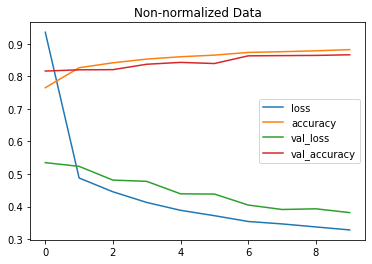

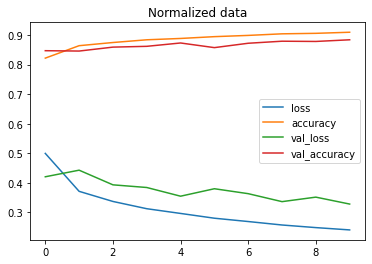

In [21]:
# Plot non-normalized data loss curves
pd.DataFrame(history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [188]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
def plot_images_2(model, test_images, test_labels, num_rows, num_cols):
  
  #make predictions
  predictions = model.predict(test_images)

  #set rows v columns of plot
  num_rows = num_rows
  num_cols = num_cols
  
  #set number of images analyzed
  num_images = 10

  #plot figure 
  plt.figure(figsize=(3*num_cols, 2*num_rows))


             
  for i in range(num_images):
    pred_label = predictions[i]
    true_label= test_labels[i]

    if pred_label.all() == true_label.all():
     color = "green"
    else:
      color = "red"

    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    
  plt.show()


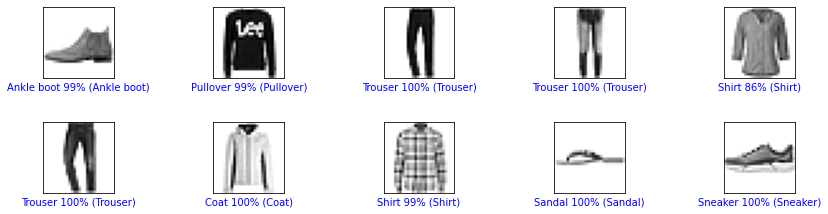

In [189]:
plot_images_2(model_3,norm_test_data, test_labels, 3, 5)

In [190]:
def confusion_maxtrix_plot(model, y_true, y_preds, classes=None):

  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  
  import itertools
  from sklearn.metrics import confusion_matrix

  figsize = (10, 10)
  text_size = 15

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Are there a list of classes?

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title= model + " Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  
  # Adjust label size
  #ax.xaxis.label.set_size(text_size)
  #ax.yaxis.label.set_size(text_size)
  #ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=7.3)

In [191]:
# Make predictions with the most recent model
y_probs = model_3.predict(norm_test_data) # "probs" is short for probabilities
y_probs

array([[8.63472209e-08, 1.38515452e-06, 1.46243568e-08, ...,
        1.43683106e-02, 4.15080166e-07, 9.85262394e-01],
       [1.96196761e-05, 6.54473567e-12, 9.90934908e-01, ...,
        4.08731189e-19, 2.54657326e-08, 2.20506057e-12],
       [7.58339138e-12, 1.00000000e+00, 2.14191474e-14, ...,
        2.57348248e-28, 1.71839189e-16, 1.59330812e-23],
       ...,
       [5.20007889e-05, 7.47712306e-07, 1.11880065e-04, ...,
        2.62580357e-09, 9.98458505e-01, 1.08449910e-07],
       [1.54655559e-08, 9.99999046e-01, 1.70826586e-09, ...,
        4.32950224e-16, 2.69722352e-11, 1.37146018e-13],
       [1.98774543e-08, 2.41726195e-09, 6.35592856e-10, ...,
        9.95382493e-07, 1.29025125e-06, 5.07730249e-07]], dtype=float32)

In [192]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [193]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

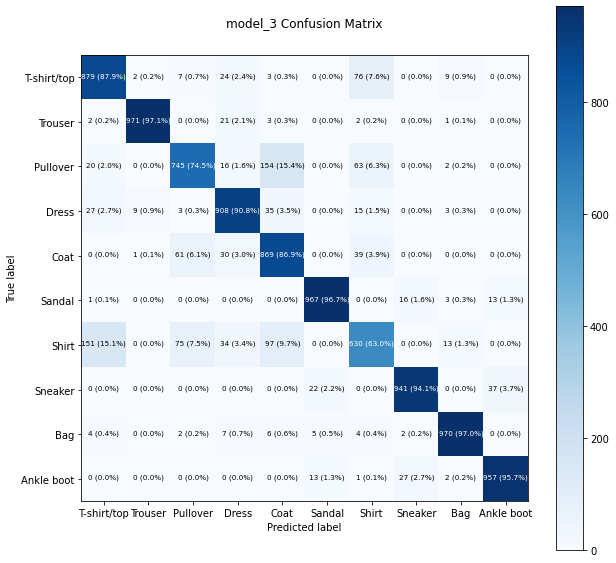

In [194]:
# Make a prettier confusion matrix
confusion_maxtrix_plot("model_3", test_labels, y_preds, class_names)